# Winding number algorithm

$$
wn=\frac{1}{2\pi} \sum_{i}^{n-1}\theta_{i} = \frac{1}{2\pi} \sum_{i}^{n-1}\frac{\vec{v_{i}P} \cdot \vec{v_{i+1}P}}{|\vec{v_{i}P}||\vec{v_{i+1}P}|}
$$

Target point is inside of closed polygon if $wn=1$, where $n$ is the number of vertex of a closed polygon, and $\theta$ is an angle spanned by line between the target point and each vertex. Angle should be measured in counter-clockwise, and the sign of angle is determined by that of outer product of vectors. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Python implementation

In [2]:
def WindingNumber(xt, yt, xp, yp):
    for j in np.arange(len(xt)):
        theta=0
        for i in np.arange(len(xp)-1):
            a=(xt[j]-xp[i])*(xt[j]-xp[i+1])+(yt[j]-yp[i])*(yt[j]-yp[i+1])
            b=np.sqrt((xt[j]-xp[i])  **2+(yt[j]-yp[i])  **2)
            c=np.sqrt((xt[j]-xp[i+1])**2+(yt[j]-yp[i+1])**2)
            t=np.arccos(a/(b*c))

            ov=(xt[j]-xp[i])*(yt[j]-yp[i+1])-(xt[j]-xp[i+1])*(yt[j]-yp[i])
            if ov<0:
                t=t*(-1.0)

            theta=theta+t

        wn=0.5/np.pi*theta
        wn = float('%1.3f' % (wn))
        if wn>0.0:
            xi.append(xt[j]); yi.append(yt[j])
        
    return xi, yi

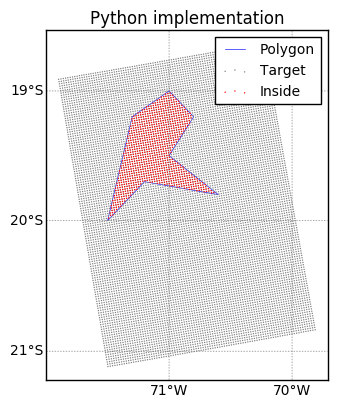

In [3]:
#load polygon points
polygon=np.loadtxt('data/Polygon.txt')
xp=polygon[:,0]; yp=polygon[:,1]

#load target points
target=np.loadtxt('data/TargetPoints.txt')
xt=target[:,1]; yt=target[:,0]

#judge
xi=[]; yi=[]
xi, yi = WindingNumber(xt, yt, xp, yp)

#plot
fig=plt.figure()
ax=fig.add_subplot(111)
m = Basemap(llcrnrlon=min(xt)-0.1,llcrnrlat=min(yt)-0.1,urcrnrlon=max(xt)+0.1,urcrnrlat=max(yt)+0.1,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='i',projection='merc')
m.drawparallels(np.arange(-90,90,1),labels=[1,0,0,0], color='gray', linewidth=0.5)
m.drawmeridians(np.arange(0,360,1),labels=[0,0,0,1], color='gray', linewidth=0.5)
(xt,yt)=m(xt,yt); (xp,yp)=m(xp,yp); (xi,yi)=m(xi,yi)
m.scatter(xt,yt,s=1,edgecolor='none',facecolor='gray', label='Target')
m.plot(xp,yp,'b-',ms=5,zorder=0,lw=0.5,alpha=30,label='Polygon')
m.scatter(xi,yi,s=1,lw=0.1,facecolor='r',edgecolor='none',label='Inside')

plt.legend(fontsize=10)
plt.title('Python implementation')
plt.tight_layout()
plt.savefig('work/WindingNumberPython.pdf', bbox_inches="tight", pad_inches=0.1)
plt.savefig('work/WindingNumberPython.png', bbox_inches="tight", pad_inches=0.1)
plt.show()

## Fortran implementation

- Usage
```bash
$ gfortran -o bin/WindingNumber src/WindingNumber.f90 
$ bin/WindingNumber 
```
- You will get `WindingNumber.txt`, whete index at 3rd column indicates if each target point is inside (`1.000`) or outside of closed polygon.  

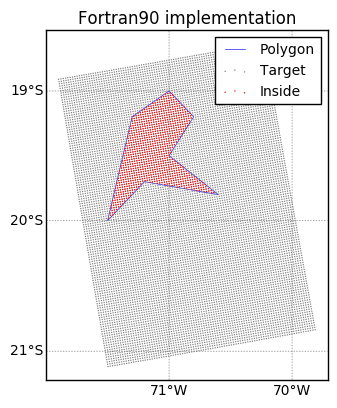

In [4]:
#load polygon points
polygon=np.loadtxt('data/Polygon.txt')
xp=polygon[:,0]; yp=polygon[:,1]

#load target points
target=np.loadtxt('data/TargetPoints.txt')
xt=target[:,1]; yt=target[:,0]

#judge
inside=np.loadtxt('work/WindingNumber.txt')
j=0
xi=[]; yi=[]
for i in np.arange(0,len(inside),1):
    if inside[i,2] == 1.000:
        j=j+1
        xi.append(inside[i,0])
        yi.append(inside[i,1])

#plot
fig=plt.figure()
ax=fig.add_subplot(111)
m = Basemap(llcrnrlon=min(xt)-0.1,llcrnrlat=min(yt)-0.1,urcrnrlon=max(xt)+0.1,urcrnrlat=max(yt)+0.1,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='i',projection='merc')
m.drawparallels(np.arange(-90,90,1),labels=[1,0,0,0], color='gray', linewidth=0.5)
m.drawmeridians(np.arange(0,360,1),labels=[0,0,0,1], color='gray', linewidth=0.5)
(xt,yt)=m(xt,yt); (xp,yp)=m(xp,yp); (xi,yi)=m(xi,yi)
m.scatter(xt,yt,s=1,edgecolor='none',facecolor='gray', label='Target')
m.plot(xp,yp,'b-',ms=5,zorder=0,lw=0.5,alpha=30,label='Polygon')
m.scatter(xi,yi,s=1,lw=0.1,facecolor='r',edgecolor='none',label='Inside')

plt.legend(fontsize=10)
plt.title('Fortran90 implementation')
plt.tight_layout()
plt.savefig('work/WindingNumberFortran90.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()